In [8]:
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import itertools

In [9]:
RESULT_URL = "https://huggingface.co/henryscheible/experiment_results/raw/main/results_cross_dataset_ablation_2023-01-11%2004%3A46%3A27.482059.json"

In [10]:
data = json.loads(requests.get(RESULT_URL).text)

In [11]:
data.keys()

dict_keys(['winobias_bert_classifieronly', 'crows_pairs_bert_classifieronly', 'stereoset_binary_bert_classifieronly'])

In [12]:
checkpoints = list(data.keys())
suffix = "250"

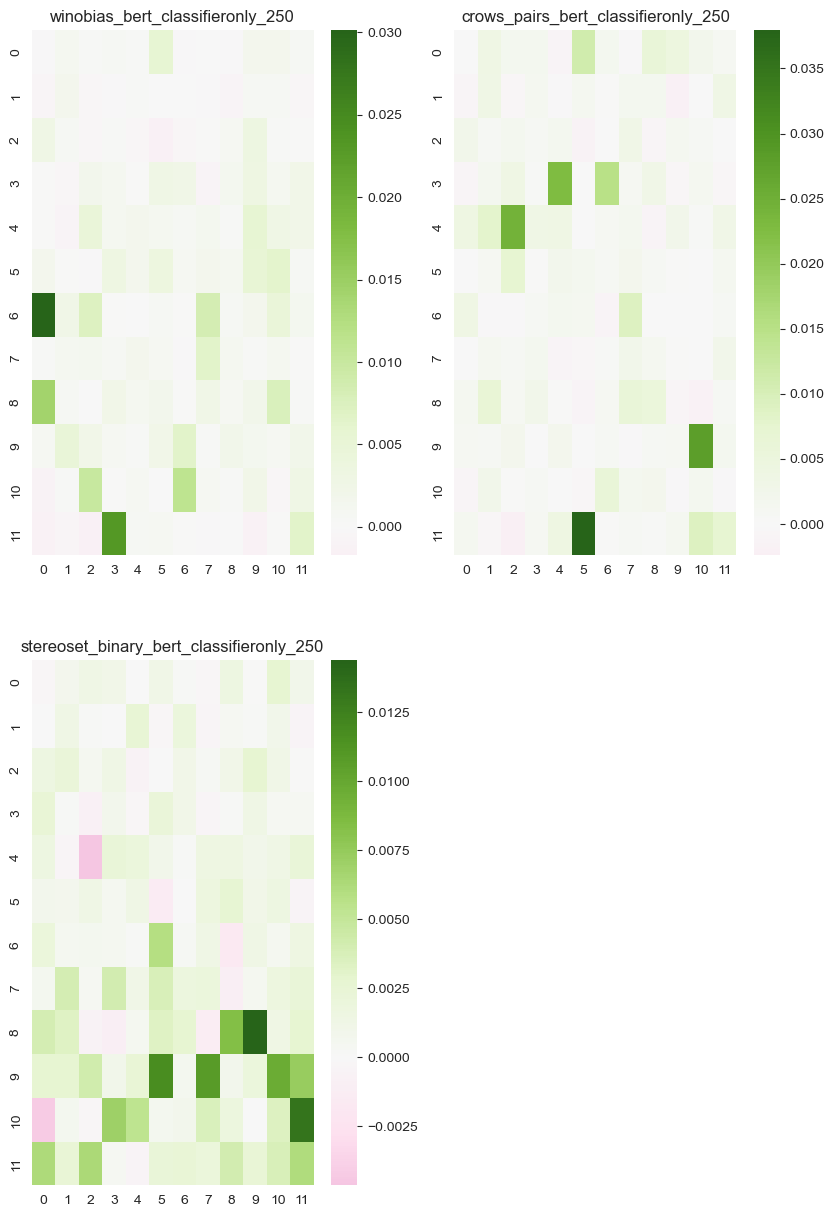

In [13]:
import math

fig = plt.figure(figsize=(10, 15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints):
    ax = fig.add_subplot(math.ceil(len(checkpoints)/2.), 2,i+1)
    ax.set_title(f"{checkpoint}_{suffix}")
    sns.heatmap(np.array(data[checkpoint][checkpoint][suffix]["contribs"]).reshape(12, 12), ax=ax, cmap="PiYG", center=0)
plt.show()

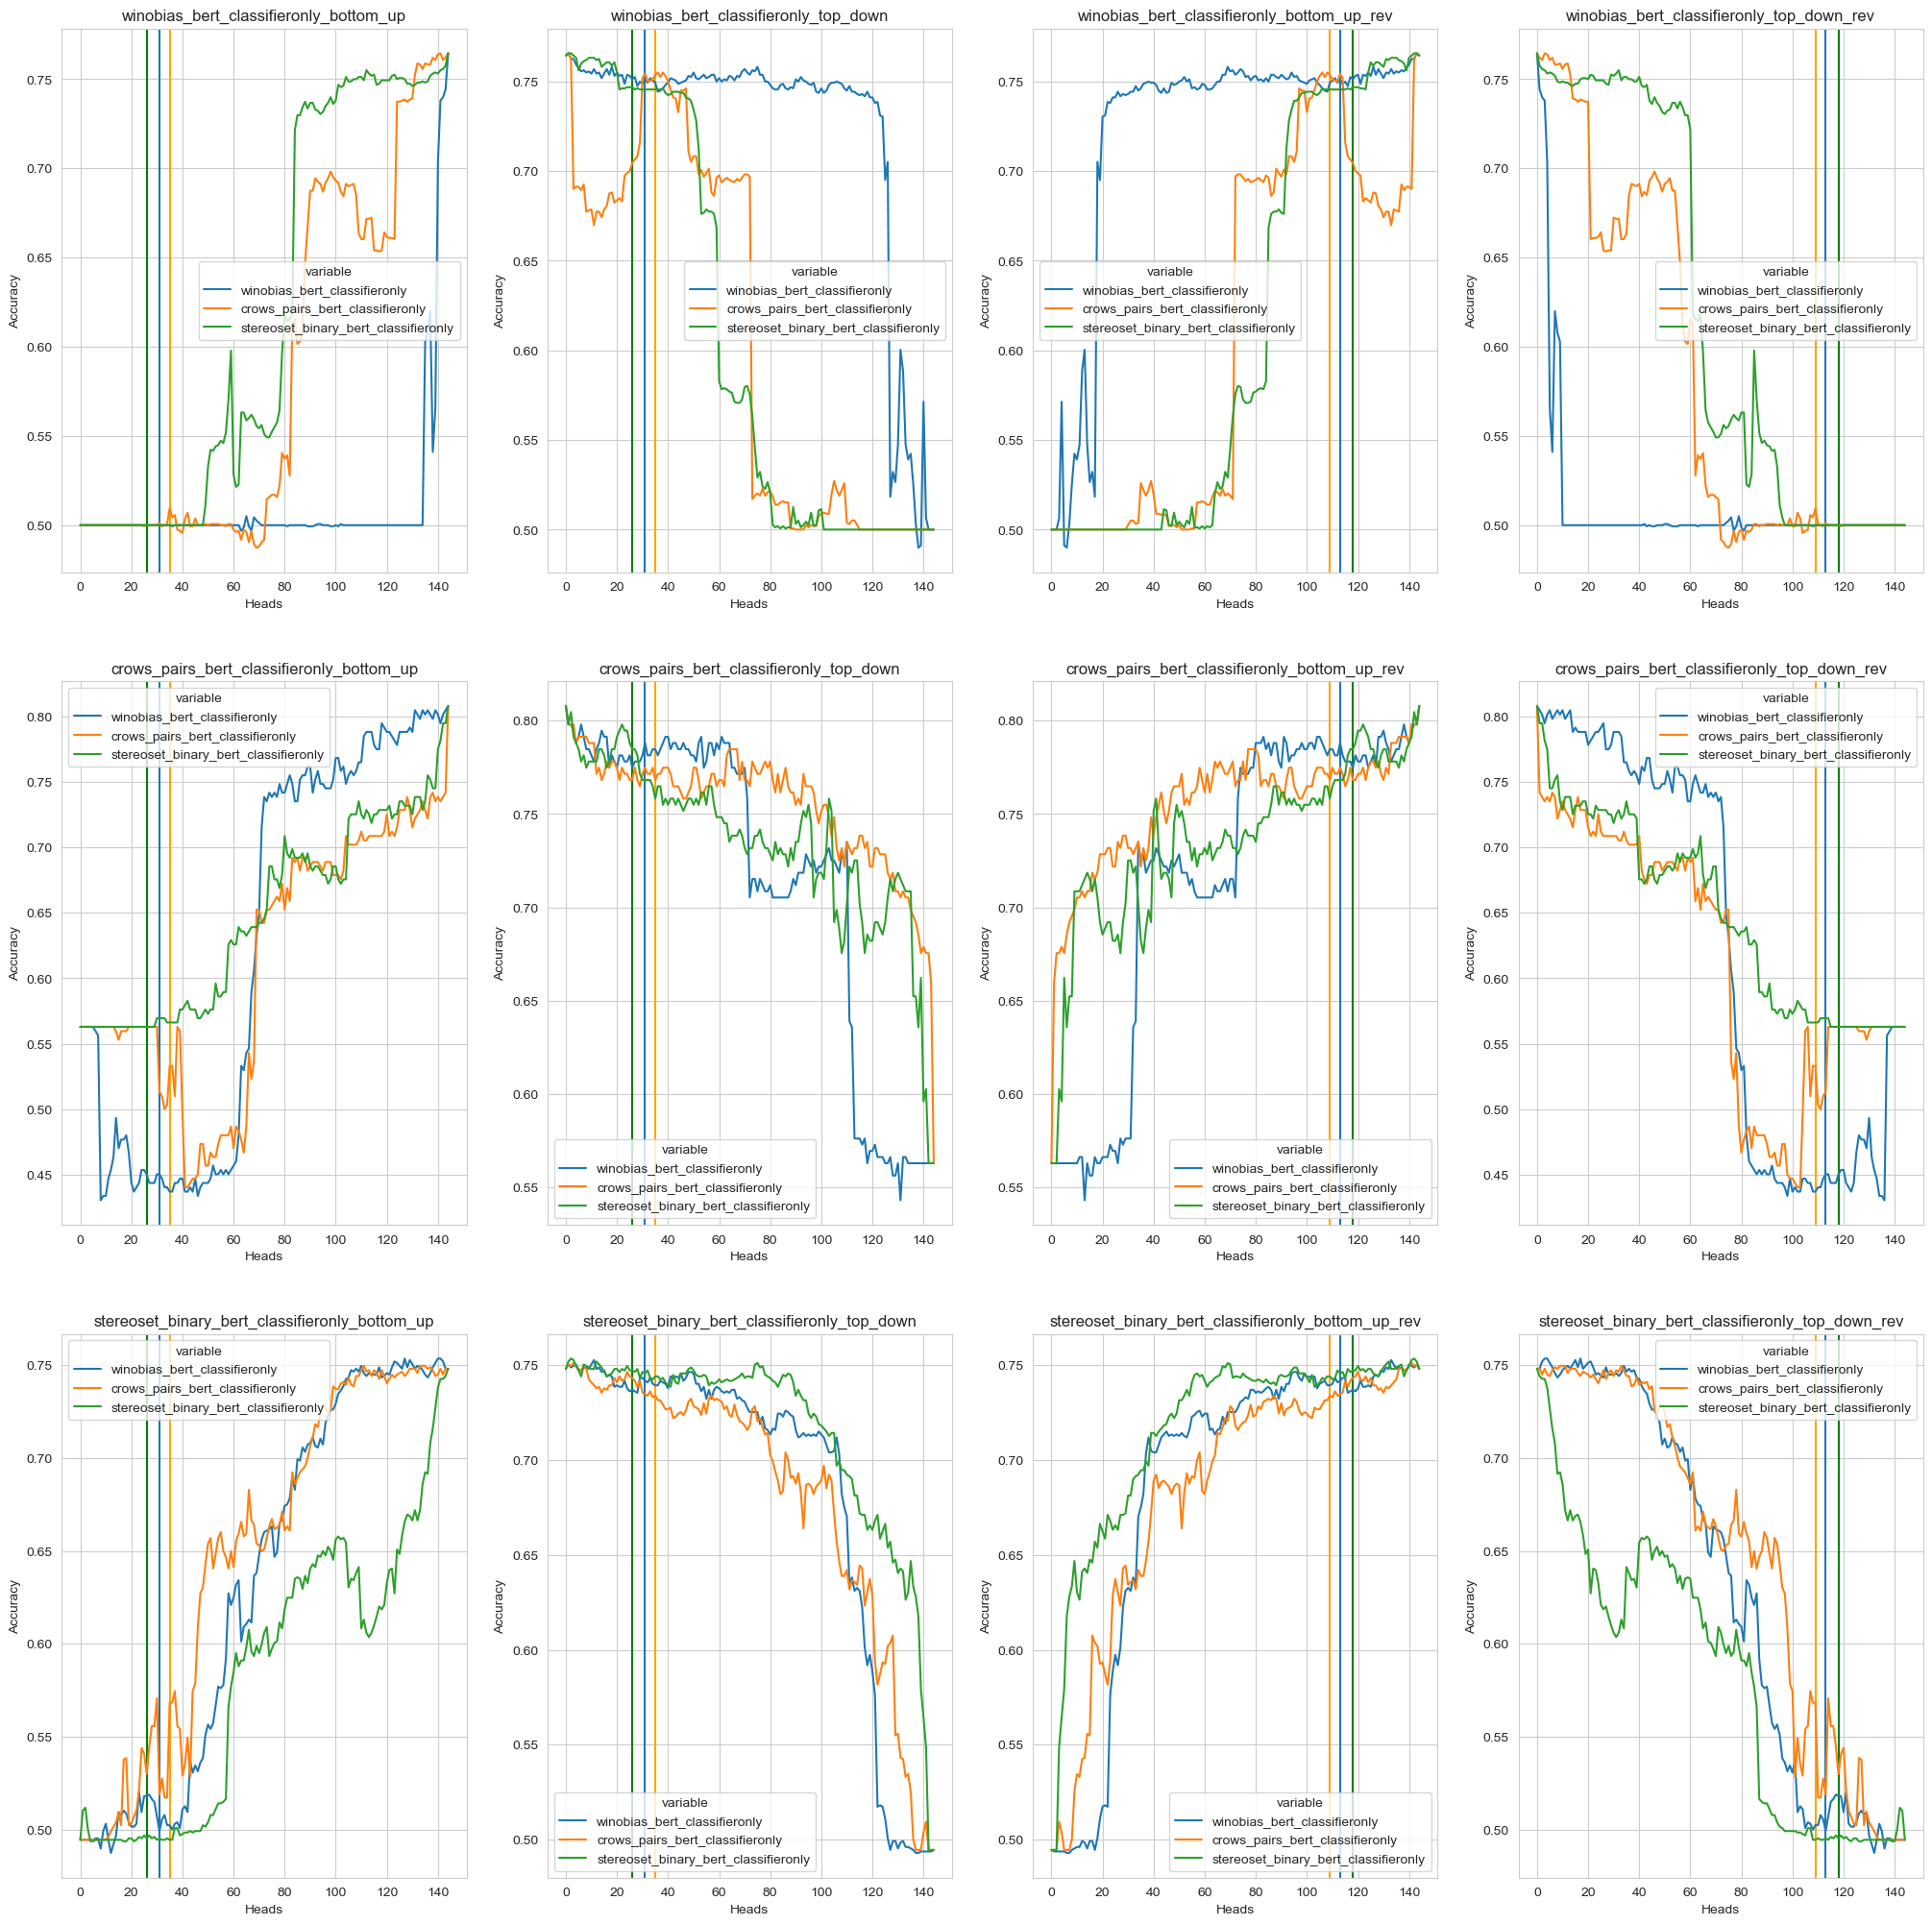

In [21]:
fig = plt.figure(figsize=(25, 25))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints):
    ax = fig.add_subplot(len(checkpoints),4, 4*i+1)
    records = {contrib_checkpoint : data[checkpoint][contrib_checkpoint][suffix]['bottom_up_results'] for contrib_checkpoint in checkpoints}
    records['heads'] = np.arange(145)
    df = pd.DataFrame(records)
    for contrib_checkpoint, color in zip(checkpoints, ["tab:blue", "orange", "green"]):
        contribs = np.asarray(data[checkpoint][contrib_checkpoint][suffix]["contribs"])
        vline = (contribs < 0).sum()
        ax.axvline(vline, 0, 1, color=color)
    ax.set_title(f"{checkpoint}_bottom_up")
    sns.lineplot(x='heads', y='value', hue='variable',
                data=pd.melt(df, ['heads']), ax=ax)
    ax.set(xlabel="Heads", ylabel="Accuracy")

    ax = fig.add_subplot(len(checkpoints),4, 4*i+2)
    records = {contrib_checkpoint : data[checkpoint][contrib_checkpoint][suffix]['top_down_results'] for contrib_checkpoint in checkpoints}
    records['heads'] = np.arange(145)
    df = pd.DataFrame(records)
    for contrib_checkpoint, color in zip(checkpoints, ["tab:blue", "orange", "green"]):
        contribs = np.asarray(data[checkpoint][contrib_checkpoint][suffix]["contribs"])
        vline = (contribs < 0).sum()
        ax.axvline(vline, 0, 1, color=color)
    ax.set_title(f"{checkpoint}_top_down")
    sns.lineplot(x='heads', y='value', hue='variable',
                data=pd.melt(df, ['heads']), ax=ax)
    ax.set(xlabel="Heads", ylabel="Accuracy")

    ax = fig.add_subplot(len(checkpoints),4, 4*i+3)
    records = {contrib_checkpoint : data[checkpoint][contrib_checkpoint][suffix]['bottom_up_rev_results'] for contrib_checkpoint in checkpoints}
    records['heads'] = np.arange(145)
    df = pd.DataFrame(records)
    for contrib_checkpoint, color in zip(checkpoints, ["tab:blue", "orange", "green"]):
        contribs = np.asarray(data[checkpoint][contrib_checkpoint][suffix]["contribs"])
        vline = (contribs > 0).sum()
        ax.axvline(vline, 0, 1, color=color)
    ax.set_title(f"{checkpoint}_bottom_up_rev")
    sns.lineplot(x='heads', y='value', hue='variable',
                data=pd.melt(df, ['heads']), ax=ax)
    ax.set(xlabel="Heads", ylabel="Accuracy")

    ax = fig.add_subplot(len(checkpoints),4, 4*i+4)
    records = {contrib_checkpoint : data[checkpoint][contrib_checkpoint][suffix]['top_down_rev_results'] for contrib_checkpoint in checkpoints}
    records['heads'] = np.arange(145)
    df = pd.DataFrame(records)
    for contrib_checkpoint, color in zip(checkpoints, ["tab:blue", "orange", "green"]):
        contribs = np.asarray(data[checkpoint][contrib_checkpoint][suffix]["contribs"])
        vline = (contribs > 0).sum()
        ax.axvline(vline, 0, 1, color=color)
    ax.set_title(f"{checkpoint}_top_down_rev")
    sns.lineplot(x='heads', y='value', hue='variable',
                data=pd.melt(df, ['heads']), ax=ax)
    ax.set(xlabel="Heads", ylabel="Accuracy")

plt.show()